# Multiple Factor Parametric Tests - R

## Factorial ANOVA

* **Samples:** `≥2`
* **Levels:** `≥2`
* **Between or Within Subjects:** Between
* **Reporting:** "Figure 8 shows an interaction plot with ±1 standard deviation error bars for X1 and X2. A factorial ANOVA indicated a statistically significant effect on Y of X1 (F(1, 56) = 9.35, p < .01) and X2 (F(1, 56) = 4.30, p < .05), but not of the X1×X2 interaction (F(1, 56) = 0.42, n.s.)."

In [9]:
# Example data
# df has subjects (S), two between-Ss factors (X1,X2) each w/levels (a,b), and continuous response (Y)
df <- read.csv("data/2F2LBs.csv")
head(df, 20)

,S,X1,X2,Y
,<int>,<chr>,<chr>,<dbl>
1,1,a,a,9.939918
2,2,a,b,12.271865
3,3,b,a,11.062279
4,4,b,b,12.763591
5,5,a,a,7.980861
6,6,a,b,10.468626
7,7,b,a,21.071315
8,8,b,b,15.270048
9,9,a,a,22.125037


In [11]:
library(ez) # for ezANOVA

df$S = factor(df$S) # Subject id is nominal
df$X1 = factor(df$X1) # X1 is a 2-level factor
df$X2 = factor(df$X2) # X2 is a 2-level factor

m = ezANOVA(dv=Y, between=c(X1,X2), wid=S, type=3, data=df) # use c() for >1 factors
m$Levene # if p<.05, we have a violation of homoscedasticity, so use a White-adjusted ANOVA

Coefficient covariances computed by hccm()



DFn,DFd,SSn,SSd,F,p,p<.05
<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
3,56,36.93165,149.7687,4.603036,0.005989026,*


In [12]:
m= ezANOVA(dv=Y, between=c(X1,X2), wid=S, type=3, data=df, white.adjust=TRUE) # heteroscedastic
m$ANOVA

Coefficient covariances computed by hccm()



,Effect,DFn,DFd,F,p,p<.05
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
2,X1,1,56,8.7309193,0.004569383,*
3,X2,1,56,4.0094897,0.050096183,
4,X1:X2,1,56,0.3876081,0.536086422,


In [13]:
# the following also performs the same factorial ANOVA
m = aov(Y ~ X1*X2, data=df)
anova(m)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
X1,1,60.039468,60.039468,9.3545564,0.003408605
X2,1,27.571854,27.571854,4.2958818,0.042819437
X1:X2,1,2.665445,2.665445,0.4152944,0.521925508
Residuals,56,359.419527,6.418206,NA,NA


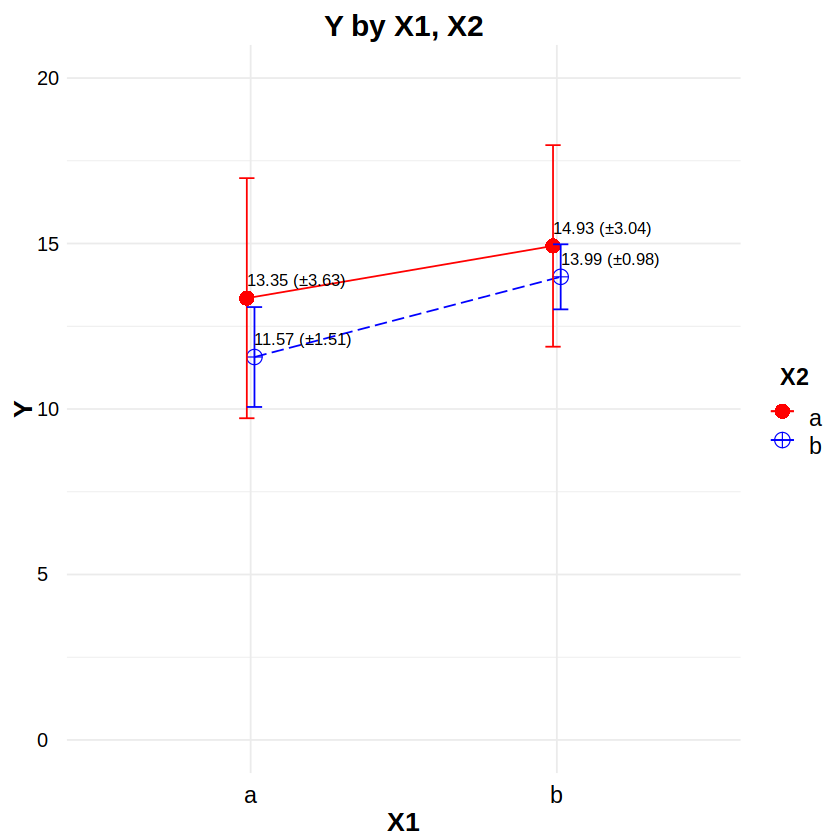

In [17]:
library(ggplot2)
library(ggthemes)
library(scales)
library(plyr)

# Interaction plot
# http://www.sthda.com/english/wiki/ggplot2-line-plot-quick-start-guide-r-software-and-data-visualization
# http://www.sthda.com/english/wiki/ggplot2-error-bars-quick-start-guide-r-software-and-data-visualization
# http://www.sthda.com/english/wiki/ggplot2-point-shapes
# http://www.sthda.com/english/wiki/ggplot2-line-types-how-to-change-line-types-of-a-graph-in-r-software
df2 <- ddply(df, ~ X1*X2, function(d) # make a summary data table
  c(NROW(d$Y),
    sum(is.na(d$Y)),
    sum(!is.na(d$Y)),
    mean(d$Y, na.rm=TRUE),
    sd(d$Y, na.rm=TRUE),
    median(d$Y, na.rm=TRUE),
    IQR(d$Y, na.rm=TRUE)))
colnames(df2) <- c("X1","X2","Rows","NAs","NotNAs","Mean","SD","Median","IQR")
ggplot(data=df2, aes(x=X1, y=Mean, color=X2, group=X2)) + theme_minimal() + 
  # set the font styles for the plot title and axis titles
  theme(plot.title   = element_text(face="bold",  color="black", size=18, hjust=0.5, vjust=0.0, angle=0)) + 
  theme(axis.title.x = element_text(face="bold",  color="black", size=16, hjust=0.5, vjust=0.0, angle=0)) + 
  theme(axis.title.y = element_text(face="bold",  color="black", size=16, hjust=0.5, vjust=0.0, angle=90)) + 
  # set the font styles for the value labels that show on each axis
  theme(axis.text.x  = element_text(face="plain", color="black", size=14, hjust=0.5, vjust=0.0, angle=0)) + 
  theme(axis.text.y  = element_text(face="plain", color="black", size=12, hjust=0.0, vjust=0.5, angle=0)) + 
  # set the font styles for the legend
  theme(legend.title = element_text(face="bold", color="black", size=14, hjust=0.5, vjust=0.0, angle=0)) +
  theme(legend.text  = element_text(face="plain", color="black", size=14, hjust=0.5, vjust=0.0, angle=0)) +
  # create the plot lines, points, and error bars
  geom_line(aes(linetype=X2), position=position_dodge(0.05)) + 
  geom_point(aes(shape=X2, size=X2), position=position_dodge(0.05)) + 
  geom_errorbar(aes(ymin=Mean-SD, ymax=Mean+SD), position=position_dodge(0.05), width=0.1) + 
  # place text labels on each bar
  geom_text(aes(label=sprintf("%.2f (±%.2f)", Mean, SD)), position=position_dodge(0.05), hjust=0.0, vjust=-1.0, color="black", size=3.5) +
  # set the labels for the title and each axis
  labs(title="Y by X1, X2", x="X1", y="Y") + 
  # set the ranges and value labels for each axis
  scale_x_discrete(labels=c("a","b")) + 
  scale_y_continuous(breaks=seq(0,20,by=5), labels=seq(0,20,by=5), limits=c(0,20), oob=rescale_none) + 
  # set the name, labels, and colors for the traces
  scale_color_manual(name="X2", labels=c("a","b"), values=c("red", "blue")) +
  # set the size and shape of the points
  scale_size_manual(values=c(4,4)) +
  scale_shape_manual(values=c(16,10)) +
  # set the linetype of the lines
  scale_linetype_manual(values=c("solid", "longdash"))

## Linear Model (LM)

* **Samples:** `≥2`
* **Levels:** `≥2`
* **Between or Within Subjects:** Between
* **Reporting:** "Figure 8 shows an interaction plot with ±1 standard deviation error bars for X1 and X2. An analysis of variance indicated a statistically significant effect on Y of X1 (F(1, 56) = 9.35, p < .01) and X2 (F(1, 56) = 4.30, p < .05), but not of the X1×X2 interaction (F(1, 56) = 0.42, n.s.)."

In [14]:
# Example data
# df has subjects (S), two between-Ss factors (X1,X2) each w/levels (a,b), and continuous response (Y)
df <- read.csv("data/2F2LBs.csv")
head(df, 20)

,S,X1,X2,Y
,<int>,<chr>,<chr>,<dbl>
1,1,a,a,9.939918
2,2,a,b,12.271865
3,3,b,a,11.062279
4,4,b,b,12.763591
5,5,a,a,7.980861
6,6,a,b,10.468626
7,7,b,a,21.071315
8,8,b,b,15.270048
9,9,a,a,22.125037


In [15]:
df$S = factor(df$S) # Subject id is nominal (unused)
df$X1 = factor(df$X1) # X1 is a 2-level factor
df$X2 = factor(df$X2) # X2 is a 2-level factor
m = lm(Y ~ X1*X2, data=df)
anova(m)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
X1,1,60.039468,60.039468,9.3545564,0.003408605
X2,1,27.571854,27.571854,4.2958818,0.042819437
X1:X2,1,2.665445,2.665445,0.4152944,0.521925508
Residuals,56,359.419527,6.418206,NA,NA


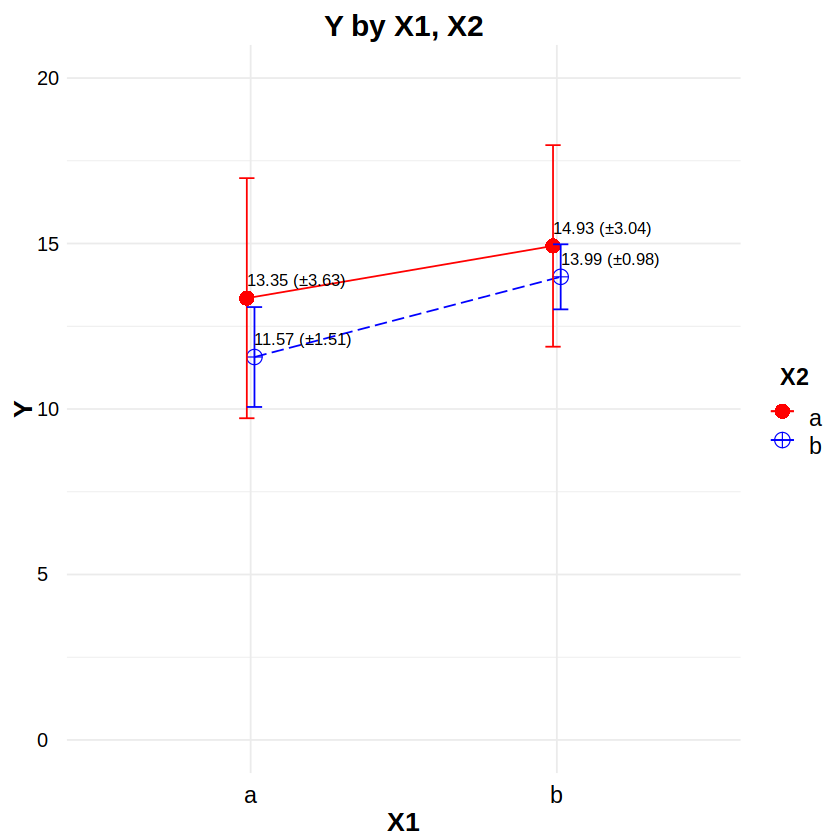

In [18]:
library(ggplot2)
library(ggthemes)
library(scales)
library(plyr)

# Interaction plot
# http://www.sthda.com/english/wiki/ggplot2-line-plot-quick-start-guide-r-software-and-data-visualization
# http://www.sthda.com/english/wiki/ggplot2-error-bars-quick-start-guide-r-software-and-data-visualization
# http://www.sthda.com/english/wiki/ggplot2-point-shapes
# http://www.sthda.com/english/wiki/ggplot2-line-types-how-to-change-line-types-of-a-graph-in-r-software
df2 <- ddply(df, ~ X1*X2, function(d) # make a summary data table
  c(NROW(d$Y),
    sum(is.na(d$Y)),
    sum(!is.na(d$Y)),
    mean(d$Y, na.rm=TRUE),
    sd(d$Y, na.rm=TRUE),
    median(d$Y, na.rm=TRUE),
    IQR(d$Y, na.rm=TRUE)))
colnames(df2) <- c("X1","X2","Rows","NAs","NotNAs","Mean","SD","Median","IQR")
ggplot(data=df2, aes(x=X1, y=Mean, color=X2, group=X2)) + theme_minimal() + 
  # set the font styles for the plot title and axis titles
  theme(plot.title   = element_text(face="bold",  color="black", size=18, hjust=0.5, vjust=0.0, angle=0)) + 
  theme(axis.title.x = element_text(face="bold",  color="black", size=16, hjust=0.5, vjust=0.0, angle=0)) + 
  theme(axis.title.y = element_text(face="bold",  color="black", size=16, hjust=0.5, vjust=0.0, angle=90)) + 
  # set the font styles for the value labels that show on each axis
  theme(axis.text.x  = element_text(face="plain", color="black", size=14, hjust=0.5, vjust=0.0, angle=0)) + 
  theme(axis.text.y  = element_text(face="plain", color="black", size=12, hjust=0.0, vjust=0.5, angle=0)) + 
  # set the font styles for the legend
  theme(legend.title = element_text(face="bold", color="black", size=14, hjust=0.5, vjust=0.0, angle=0)) +
  theme(legend.text  = element_text(face="plain", color="black", size=14, hjust=0.5, vjust=0.0, angle=0)) +
  # create the plot lines, points, and error bars
  geom_line(aes(linetype=X2), position=position_dodge(0.05)) + 
  geom_point(aes(shape=X2, size=X2), position=position_dodge(0.05)) + 
  geom_errorbar(aes(ymin=Mean-SD, ymax=Mean+SD), position=position_dodge(0.05), width=0.1) + 
  # place text labels on each bar
  geom_text(aes(label=sprintf("%.2f (±%.2f)", Mean, SD)), position=position_dodge(0.05), hjust=0.0, vjust=-1.0, color="black", size=3.5) +
  # set the labels for the title and each axis
  labs(title="Y by X1, X2", x="X1", y="Y") + 
  # set the ranges and value labels for each axis
  scale_x_discrete(labels=c("a","b")) + 
  scale_y_continuous(breaks=seq(0,20,by=5), labels=seq(0,20,by=5), limits=c(0,20), oob=rescale_none) + 
  # set the name, labels, and colors for the traces
  scale_color_manual(name="X2", labels=c("a","b"), values=c("red", "blue")) +
  # set the size and shape of the points
  scale_size_manual(values=c(4,4)) +
  scale_shape_manual(values=c(16,10)) +
  # set the linetype of the lines
  scale_linetype_manual(values=c("solid", "longdash"))

## Factorial Repeated Measures ANOVA

* **Samples:** `≥2`
* **Levels:** `≥2`
* **Between or Within Subjects:** Within
* **Reporting:** "Figure 9 shows an interaction plot with ±1 standard deviation error bars for X1 and X2. A factorial repeated measures ANOVA indicated a statistically significant effect on Y of X1 (F(1, 14) = 5.45, p < .05), but not of X2 (F(1, 14) = 0.18, n.s.), or of the X1×X2 interaction (F(1, 14) = 0.12, n.s.)."

In [26]:
# Example data
# df has subjects (S), two within-Ss factors (X1,X2) each w/levels (a,b), and continuous response (Y)
df <- read.csv("data/2F2LWs.csv")
head(df, 20)

,S,X1,X2,Y
,<int>,<chr>,<chr>,<dbl>
1,1,a,a,11.4749213
2,1,a,b,14.8431021
3,1,b,a,0.1430649
4,1,b,b,15.0210806
5,2,a,a,16.9487115
6,2,a,b,12.9088880
7,2,b,a,7.3433619
8,2,b,b,11.1885220
9,3,a,a,12.3397073


In [27]:
library(ez) # for ezANOVA

df$S = factor(df$S) # Subject id is nominal
df$X1 = factor(df$X1) # X1 is a 2-level factor
df$X2 = factor(df$X2) # X2 is a 2-level factor

m = ezANOVA(dv=Y, within=c(X1,X2), wid=S, type=3, data=df) # use c() for >1 factors
m$Mauchly # p<.05 indicates a sphericity violation

NULL

In [28]:
m$ANOVA # use if no violation

,Effect,DFn,DFd,F,p,p<.05,ges
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
2,X1,1,14,5.4537088,0.03492658,*,0.070392015
3,X2,1,14,0.1797949,0.67799256,,0.003762924
4,X1:X2,1,14,0.1223175,0.73173975,,0.002019078


In [29]:
# if there is a sphericity violation, report the Greenhouse-Geisser or Huynh-Feldt correction
p = match(m$Sphericity$Effect, m$ANOVA$Effect) # positions of within-Ss effects in m$ANOVA
m$Sphericity$GGe.DFn = m$Sphericity$GGe * m$ANOVA$DFn[p] # Greenhouse-Geisser DFs
m$Sphericity$GGe.DFd = m$Sphericity$GGe * m$ANOVA$DFd[p]
m$Sphericity$HFe.DFn = m$Sphericity$HFe * m$ANOVA$DFn[p] # Huynh-Feldt DFs
m$Sphericity$HFe.DFd = m$Sphericity$HFe * m$ANOVA$DFd[p]
m$Sphericity # show results

$GGe.DFn
numeric(0)

$GGe.DFd
numeric(0)

$HFe.DFn
numeric(0)

$HFe.DFd
numeric(0)

In [30]:
# the following also performs the equivalent repeated measures ANOVA, but does not address sphericity
m = aov(Y ~ X1*X2 + Error(S/(X1*X2)), data=df)
summary(m)


Error: S
          Df Sum Sq Mean Sq F value Pr(>F)
Residuals 14  592.5   42.32               

Error: S:X1
          Df Sum Sq Mean Sq F value Pr(>F)  
X1         1  160.3  160.28   5.454 0.0349 *
Residuals 14  411.4   29.39                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Error: S:X2
          Df Sum Sq Mean Sq F value Pr(>F)
X2         1    8.0    8.00    0.18  0.678
Residuals 14  622.5   44.47               

Error: S:X1:X2
          Df Sum Sq Mean Sq F value Pr(>F)
X1:X2      1    4.3    4.28   0.122  0.732
Residuals 14  490.1   35.01               

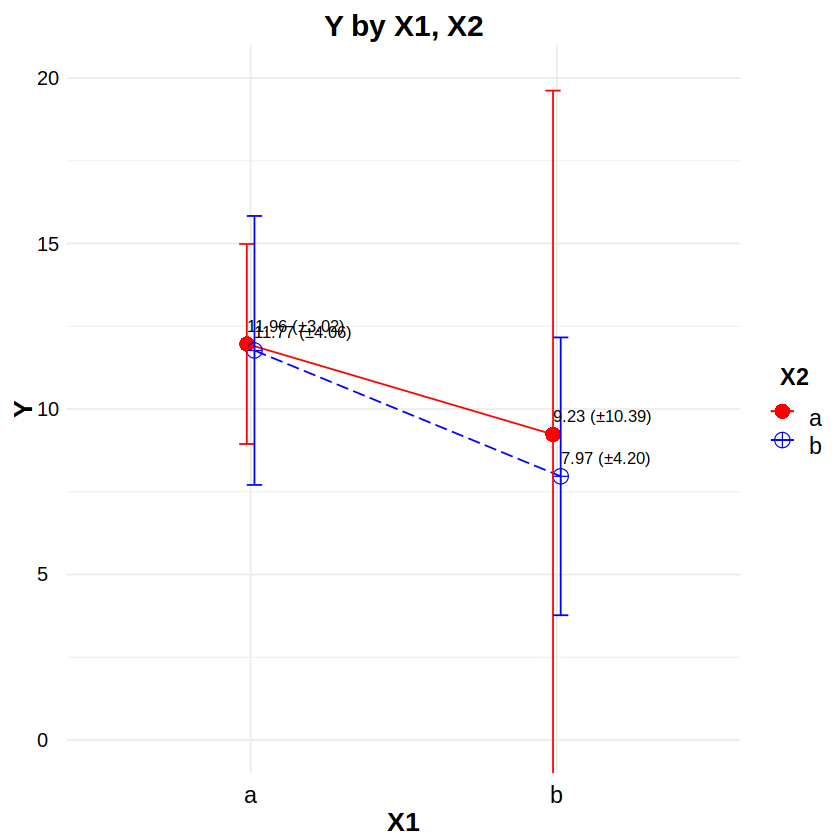

In [33]:
# Interaction plot
# http://www.sthda.com/english/wiki/ggplot2-line-plot-quick-start-guide-r-software-and-data-visualization
# http://www.sthda.com/english/wiki/ggplot2-error-bars-quick-start-guide-r-software-and-data-visualization
# http://www.sthda.com/english/wiki/ggplot2-point-shapes
# http://www.sthda.com/english/wiki/ggplot2-line-types-how-to-change-line-types-of-a-graph-in-r-software
df2 <- ddply(df, ~ X1*X2, function(d) # make a summary data table
  c(NROW(d$Y),
    sum(is.na(d$Y)),
    sum(!is.na(d$Y)),
    mean(d$Y, na.rm=TRUE),
    sd(d$Y, na.rm=TRUE),
    median(d$Y, na.rm=TRUE),
    IQR(d$Y, na.rm=TRUE)))
colnames(df2) <- c("X1","X2","Rows","NAs","NotNAs","Mean","SD","Median","IQR")
ggplot(data=df2, aes(x=X1, y=Mean, color=X2, group=X2)) + theme_minimal() + 
  # set the font styles for the plot title and axis titles
  theme(plot.title   = element_text(face="bold",  color="black", size=18, hjust=0.5, vjust=0.0, angle=0)) + 
  theme(axis.title.x = element_text(face="bold",  color="black", size=16, hjust=0.5, vjust=0.0, angle=0)) + 
  theme(axis.title.y = element_text(face="bold",  color="black", size=16, hjust=0.5, vjust=0.0, angle=90)) + 
  # set the font styles for the value labels that show on each axis
  theme(axis.text.x  = element_text(face="plain", color="black", size=14, hjust=0.5, vjust=0.0, angle=0)) + 
  theme(axis.text.y  = element_text(face="plain", color="black", size=12, hjust=0.0, vjust=0.5, angle=0)) + 
  # set the font styles for the legend
  theme(legend.title = element_text(face="bold", color="black", size=14, hjust=0.5, vjust=0.0, angle=0)) +
  theme(legend.text  = element_text(face="plain", color="black", size=14, hjust=0.5, vjust=0.0, angle=0)) +
  # create the plot lines, points, and error bars
  geom_line(aes(linetype=X2), position=position_dodge(0.05)) + 
  geom_point(aes(shape=X2, size=X2), position=position_dodge(0.05)) + 
  geom_errorbar(aes(ymin=Mean-SD, ymax=Mean+SD), position=position_dodge(0.05), width=0.1) + 
  # place text labels on each bar
  geom_text(aes(label=sprintf("%.2f (±%.2f)", Mean, SD)), position=position_dodge(0.05), hjust=0.0, vjust=-1.0, color="black", size=3.5) +
  # set the labels for the title and each axis
  labs(title="Y by X1, X2", x="X1", y="Y") + 
  # set the ranges and value labels for each axis
  scale_x_discrete(labels=c("a","b")) + 
  scale_y_continuous(breaks=seq(0,20,by=5), labels=seq(0,20,by=5), limits=c(0,20), oob=rescale_none) + 
  # set the name, labels, and colors for the traces
  scale_color_manual(name="X2", labels=c("a","b"), values=c("red", "blue")) +
  # set the size and shape of the points
  scale_size_manual(values=c(4,4)) +
  scale_shape_manual(values=c(16,10)) +
  # set the linetype of the lines
  scale_linetype_manual(values=c("solid", "longdash"))

## Linear Mixed Model (LMM)

* **Samples:** `≥2`
* **Levels:** `≥2`
* **Between or Within Subjects:** Within
* **Reporting:** "Figure 9 shows an interaction plot with ±1 standard deviation error bars for X1 and X2. A linear mixed model analysis of variance indicated a statistically significant effect on Y of X1 (F(1, 42) = 4.42, p < .05), but not of X2 (F(1, 42) = 0.22, n.s.), or of the X1×X2 interaction (F(1, 42) = 0.12, n.s.)."

In [31]:
# Example data
# df has subjects (S), two within-Ss factors (X1,X2) each w/levels (a,b), and continuous response (Y)
df <- read.csv("data/2F2LWs.csv")
head(df, 20)

,S,X1,X2,Y
,<int>,<chr>,<chr>,<dbl>
1,1,a,a,11.4749213
2,1,a,b,14.8431021
3,1,b,a,0.1430649
4,1,b,b,15.0210806
5,2,a,a,16.9487115
6,2,a,b,12.9088880
7,2,b,a,7.3433619
8,2,b,b,11.1885220
9,3,a,a,12.3397073


In [32]:
library(lme4) # for lmer
library(car) # for Anova
df$S = factor(df$S) # Subject id is nominal
df$X1 = factor(df$X1) # X1 is a 2-level factor
df$X2 = factor(df$X2) # X2 is a 2-level factor
contrasts(df$X1) <- "contr.sum"
contrasts(df$X2) <- "contr.sum"
m = lmer(Y ~ X1*X2 + (1|S), data=df)
Anova(m, type=3, test.statistic="F")

Loading required package: Matrix

Loading required package: carData



,F,Df,Df.res,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),148.4297541,1,14,7.698544e-09
X1,4.4167657,1,42,4.162596e-02
X2,0.2203147,1,42,6.412279e-01
X1:X2,0.1180081,1,42,7.329188e-01


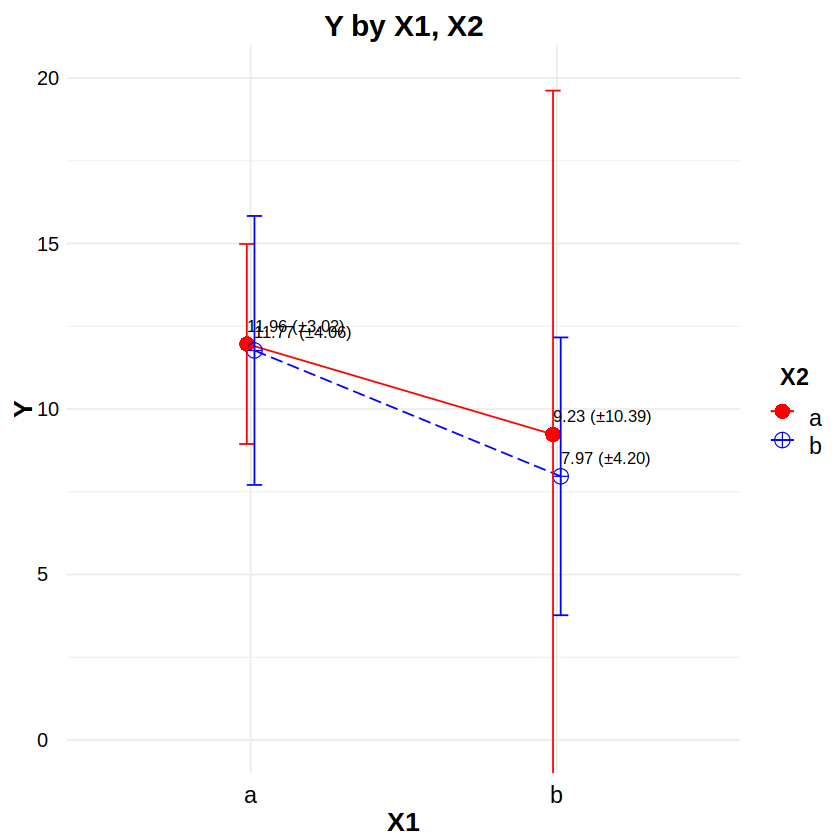

In [34]:
# Interaction plot
# http://www.sthda.com/english/wiki/ggplot2-line-plot-quick-start-guide-r-software-and-data-visualization
# http://www.sthda.com/english/wiki/ggplot2-error-bars-quick-start-guide-r-software-and-data-visualization
# http://www.sthda.com/english/wiki/ggplot2-point-shapes
# http://www.sthda.com/english/wiki/ggplot2-line-types-how-to-change-line-types-of-a-graph-in-r-software
df2 <- ddply(df, ~ X1*X2, function(d) # make a summary data table
  c(NROW(d$Y),
    sum(is.na(d$Y)),
    sum(!is.na(d$Y)),
    mean(d$Y, na.rm=TRUE),
    sd(d$Y, na.rm=TRUE),
    median(d$Y, na.rm=TRUE),
    IQR(d$Y, na.rm=TRUE)))
colnames(df2) <- c("X1","X2","Rows","NAs","NotNAs","Mean","SD","Median","IQR")
ggplot(data=df2, aes(x=X1, y=Mean, color=X2, group=X2)) + theme_minimal() + 
  # set the font styles for the plot title and axis titles
  theme(plot.title   = element_text(face="bold",  color="black", size=18, hjust=0.5, vjust=0.0, angle=0)) + 
  theme(axis.title.x = element_text(face="bold",  color="black", size=16, hjust=0.5, vjust=0.0, angle=0)) + 
  theme(axis.title.y = element_text(face="bold",  color="black", size=16, hjust=0.5, vjust=0.0, angle=90)) + 
  # set the font styles for the value labels that show on each axis
  theme(axis.text.x  = element_text(face="plain", color="black", size=14, hjust=0.5, vjust=0.0, angle=0)) + 
  theme(axis.text.y  = element_text(face="plain", color="black", size=12, hjust=0.0, vjust=0.5, angle=0)) + 
  # set the font styles for the legend
  theme(legend.title = element_text(face="bold", color="black", size=14, hjust=0.5, vjust=0.0, angle=0)) +
  theme(legend.text  = element_text(face="plain", color="black", size=14, hjust=0.5, vjust=0.0, angle=0)) +
  # create the plot lines, points, and error bars
  geom_line(aes(linetype=X2), position=position_dodge(0.05)) + 
  geom_point(aes(shape=X2, size=X2), position=position_dodge(0.05)) + 
  geom_errorbar(aes(ymin=Mean-SD, ymax=Mean+SD), position=position_dodge(0.05), width=0.1) + 
  # place text labels on each bar
  geom_text(aes(label=sprintf("%.2f (±%.2f)", Mean, SD)), position=position_dodge(0.05), hjust=0.0, vjust=-1.0, color="black", size=3.5) +
  # set the labels for the title and each axis
  labs(title="Y by X1, X2", x="X1", y="Y") + 
  # set the ranges and value labels for each axis
  scale_x_discrete(labels=c("a","b")) + 
  scale_y_continuous(breaks=seq(0,20,by=5), labels=seq(0,20,by=5), limits=c(0,20), oob=rescale_none) + 
  # set the name, labels, and colors for the traces
  scale_color_manual(name="X2", labels=c("a","b"), values=c("red", "blue")) +
  # set the size and shape of the points
  scale_size_manual(values=c(4,4)) +
  scale_shape_manual(values=c(16,10)) +
  # set the linetype of the lines
  scale_linetype_manual(values=c("solid", "longdash"))